# 1. Camera Calibration

This script intends to calibrate a camera using an object.
For this implementation we will use the DLT transform for the estimation of the camera parameters

**Import the libraries**

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
#%matplotlib widget

## Direct Linear Transform

**Implementation:**


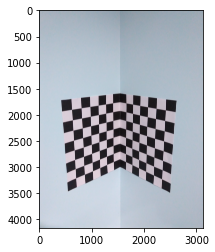

In [6]:
#Import the image
img = cv2.imread("images/calib_object.jpg")
# convert it to gray scale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)

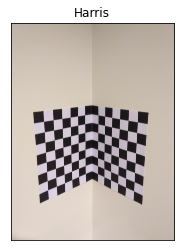

(4160, 3120, 3)


In [8]:
dst = cv2.cornerHarris(gray,2,3,0.07)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image
threshold = 0.02
ret, dst = cv2.threshold(img,threshold*dst.max(),255,0)
dst = np.uint8(dst)
cv2.connectedComponentsWithStats
#find centroids
#ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)


plt.figure("Harris detector")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Harris")
plt.xticks([]), plt.yticks([])
plt.show()
print(dst.shape)